<a href="https://colab.research.google.com/github/algoritmosdenegociacion/modulo2/blob/main/M3_L3_S1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de Negociación basados en Machine Learning - Módulo 3
- Sergio Andrés Cabrales, Ph.D., Universidad de los Andes 
- Juan Pablo Cortés, T.A., Universidad de los Andes
- Juan David Pava

https://github.com/algoritmosdenegociacion/

## 1. Carga de librerías, funciones y APIs necesarias.


#### 1.1. Se cargan las librerías necesarias

In [ ]:
pip install yfinance

     |████████████████████████████████| 6.3 MB 31.5 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=ee5d3eda21ef222cb1a3eea7e96fe4da287be4fb2ac8ccf4889796c2ed37d087
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
# Funciones numéricas adicionales
import numpy as np

# Lectura de datos y manejo de Data-sets
import pandas as pd

# Datos
import yfinance as yfin

# Gráficos 
import matplotlib.pyplot as plt

## 2. Obtención de datos históricos


#### 2.1. Se cargan los datos 


In [ ]:
# Descargamos datos
df = yfin.download('AMZN', data_source='yahoo',start='2020-01-01', end='2021-01-01')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,1875.000000,1898.010010,1864.150024,1898.010010,1898.010010,4029000
2020-01-03,1864.500000,1886.199951,1864.500000,1874.969971,1874.969971,3764400
2020-01-06,1860.000000,1903.689941,1860.000000,1902.880005,1902.880005,4061800
2020-01-07,1904.500000,1913.890015,1892.040039,1906.859985,1906.859985,4044900
2020-01-08,1898.040039,1911.000000,1886.439941,1891.969971,1891.969971,3508000
...,...,...,...,...,...,...
2020-12-24,3193.899902,3202.000000,3169.000000,3172.689941,3172.689941,1451900
2020-12-28,3194.000000,3304.000000,3172.689941,3283.959961,3283.959961,5686800
2020-12-29,3309.939941,3350.649902,3281.219971,3322.000000,3322.000000,4872900


## 3. Calcular la media móvil exponencial (EMA)

#### 3.1. Agregar al dataset las EMAs de 5 y 20 días

In [ ]:
# media móvil exponencial (EMA) 5 días
df['EMA_short'] = df['Close'].ewm(span=5, adjust=False).mean()

# media móvil exponencial (EMA) 20 días
df['EMA_long'] = df['Close'].ewm(span=20, adjust=False).mean()

df

,Open,High,Low,Close,Adj Close,Volume,EMA_short,EMA_long
Date,,,,,,,,
2020-01-02,1875.000000,1898.010010,1864.150024,1898.010010,1898.010010,4029000,1898.010010,1898.010010
2020-01-03,1864.500000,1886.199951,1864.500000,1874.969971,1874.969971,3764400,1890.329997,1895.815720
2020-01-06,1860.000000,1903.689941,1860.000000,1902.880005,1902.880005,4061800,1894.513333,1896.488509
2020-01-07,1904.500000,1913.890015,1892.040039,1906.859985,1906.859985,4044900,1898.628884,1897.476269
2020-01-08,1898.040039,1911.000000,1886.439941,1891.969971,1891.969971,3508000,1896.409246,1896.951860
...,...,...,...,...,...,...,...,...
2020-12-24,3193.899902,3202.000000,3169.000000,3172.689941,3172.689941,1451900,3188.985614,3177.657856
2020-12-28,3194.000000,3304.000000,3172.689941,3283.959961,3283.959961,5686800,3220.643730,3187.781866
2020-12-29,3309.939941,3350.649902,3281.219971,3322.000000,3322.000000,4872900,3254.429153,3200.564545


#### 3.2. Gráfico de los precios y las EMAs

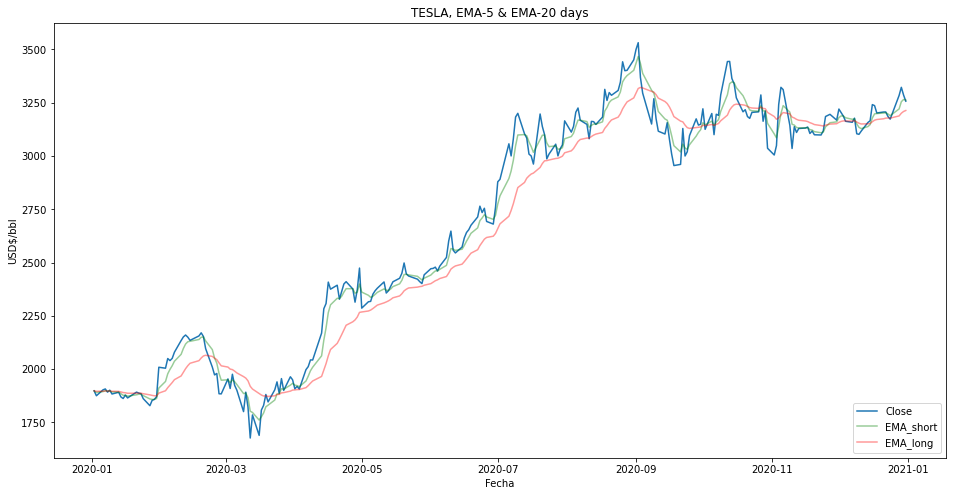

In [ ]:
# Gráfico de la serie de precios y sus medias móviles exponenciales.
plt.figure(figsize=(16,8))
plt.title('TESLA, EMA-5 & EMA-20 days')
plt.plot(df['Close'])
plt.plot(df['EMA_short'], color='green', alpha=0.4)
plt.plot(df['EMA_long'], color='red', alpha=0.4)
plt.xlabel('Fecha')
plt.ylabel('USD$/bbl')
plt.legend(['Close', 'EMA_short', 'EMA_long'], loc = 'lower right')
plt.show()

## 4. Obtención de señales de compra y venta

#### 4.1. Estrategia para obtener las señales

In [ ]:
# Número de datos
N = len(df)

# Crea una lista para almacenar las señales
  # -1 vender
  # 0 mantener
  # 1 comprar
signals = [0]

# Recorre la ventana de tiempo a partir del día 1
for i in range(1, N):

  # Obtiene las medias móviles exponenciales del día i
  short = df['EMA_short'][i]
  long = df['EMA_long'][i]

  # Obtiene las medias móviles exponenciales del día i-1
  p_short = df['EMA_short'][i-1]
  p_long = df['EMA_long'][i-1]

  # Compruebe si la EMA a corto plazo cruza por encima de la EMA a largo plazo
  if p_short < p_long and short >= long:
    signals.append(1)

  # Compruebe si la EMA a corto plazo cruza por debajo de la EMA a largo plazo
  elif p_short > p_long and short <= long:
    signals.append(-1)

  # Cuando las medias móviles exponenciales no se cruzan
  else:
    signals.append(0)

df['Signals'] = signals
df

,Open,High,Low,Close,Adj Close,Volume,EMA_short,EMA_long,Signals
Date,,,,,,,,,
2020-01-02,1875.000000,1898.010010,1864.150024,1898.010010,1898.010010,4029000,1898.010010,1898.010010,0
2020-01-03,1864.500000,1886.199951,1864.500000,1874.969971,1874.969971,3764400,1890.329997,1895.815720,0
2020-01-06,1860.000000,1903.689941,1860.000000,1902.880005,1902.880005,4061800,1894.513333,1896.488509,0
2020-01-07,1904.500000,1913.890015,1892.040039,1906.859985,1906.859985,4044900,1898.628884,1897.476269,1
2020-01-08,1898.040039,1911.000000,1886.439941,1891.969971,1891.969971,3508000,1896.409246,1896.951860,-1
...,...,...,...,...,...,...,...,...,...
2020-12-24,3193.899902,3202.000000,3169.000000,3172.689941,3172.689941,1451900,3188.985614,3177.657856,0
2020-12-28,3194.000000,3304.000000,3172.689941,3283.959961,3283.959961,5686800,3220.643730,3187.781866,0
2020-12-29,3309.939941,3350.649902,3281.219971,3322.000000,3322.000000,4872900,3254.429153,3200.564545,0


#### 4.2. Gráfico de las señales de trading

In [ ]:
df['Buy'] = np.where(df['Signals']==1, df['Close'], np.nan)
df['Sell'] = np.where(df['Signals']==-1, df['Close'], np.nan)
df

,Open,High,Low,Close,Adj Close,Volume,EMA_short,EMA_long,Signals,Buy,Sell
Date,,,,,,,,,,,
2020-01-02,1875.000000,1898.010010,1864.150024,1898.010010,1898.010010,4029000,1898.010010,1898.010010,0,NaN,NaN
2020-01-03,1864.500000,1886.199951,1864.500000,1874.969971,1874.969971,3764400,1890.329997,1895.815720,0,NaN,NaN
2020-01-06,1860.000000,1903.689941,1860.000000,1902.880005,1902.880005,4061800,1894.513333,1896.488509,0,NaN,NaN
2020-01-07,1904.500000,1913.890015,1892.040039,1906.859985,1906.859985,4044900,1898.628884,1897.476269,1,1906.859985,NaN
2020-01-08,1898.040039,1911.000000,1886.439941,1891.969971,1891.969971,3508000,1896.409246,1896.951860,-1,NaN,1891.969971
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,3193.899902,3202.000000,3169.000000,3172.689941,3172.689941,1451900,3188.985614,3177.657856,0,NaN,NaN
2020-12-28,3194.000000,3304.000000,3172.689941,3283.959961,3283.959961,5686800,3220.643730,3187.781866,0,NaN,NaN
2020-12-29,3309.939941,3350.649902,3281.219971,3322.000000,3322.000000,4872900,3254.429153,3200.564545,0,NaN,NaN


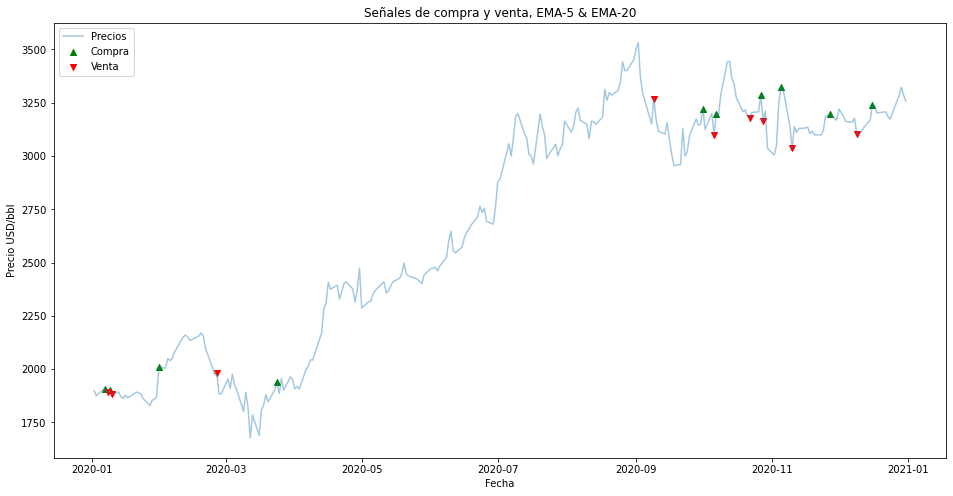

In [ ]:
# Mostrar visualmente las señales de compra y venta de acciones
plt.figure(figsize=(16,8))
plt.plot(df['Close'], alpha = 0.4, label = 'Precios')

plt.scatter(df.index, df['Buy'], color='green', marker='^', label = 'Compra')
plt.scatter(df.index, df['Sell'], color = 'red', marker='v', label = 'Venta')

plt.title('Señales de compra y venta, EMA-5 & EMA-20')
plt.xlabel('Fecha')
plt.ylabel('Precio USD/bbl')
plt.legend(loc='upper left')
plt.show()

In [ ]:

df['Buy'].count()

10

In [ ]:
df['Sell'].count()


9

## 5. Backtesting - Calcular el desempeño de una estrategia

#### 5.1. Cálculo de capital a lo largo de la venta de tiempo

In [ ]:
# Número de datos
N = len(df)

# Crea una lista para almacenar el capital
# Emezamos con 100 USD
equity = [100]

# Take Profit al 3% y Stop Loss al 1%
TP = 0.04
SL = 0.01

pos = 0
price = -1

# Recorre la ventana de tiempo a partir del día 1
for i in range(1, N):
  
  equity.append( equity[i-1] )

  if pos == 1:
    
    if df['Close'][i] >= price*(1 + TP):
      equity[i] *= 1 + TP
      pos = 0
    
    elif df['Close'][i] <= price*(1 - SL):
      equity[i] *= 1 - SL
      pos = 0

  elif pos == -1:

    if df['Close'][i] <= price*(1 - TP):
      equity[i] *= 1 + TP
      pos = 0
    
    elif df['Close'][i] >= price*(1 + SL):
      equity[i] *= 1 - SL
      pos = 0

  else:

    if df['Signals'][i] != 0:
      pos = df['Signals'][i]
      price = df['Close'][i]

df['Equity'] = equity


#### 5.2. Gráfico del capital

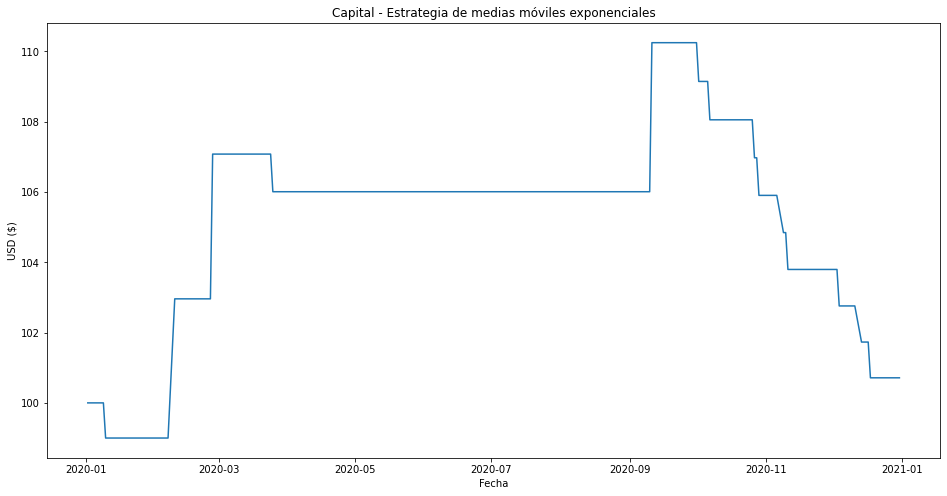

In [ ]:
# Mostrar visualmente el equity a lo largo de la ventana de tiempo
plt.figure(figsize=(16,8))
plt.plot(df['Equity'])

plt.title('Capital - Estrategia de medias móviles exponenciales')
plt.xlabel('Fecha')
plt.ylabel('USD ($)')
plt.show()

#### 5.3. Comparación con un portafolio de mercado

In [ ]:
mkt = yfin.download('^GSPC', start='2020-01-01', end='2021-01-01')
mkt

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,3244.669922,3258.139893,3235.530029,3257.850098,3257.850098,3458250000
2020-01-03,3226.360107,3246.149902,3222.340088,3234.850098,3234.850098,3461290000
2020-01-06,3217.550049,3246.840088,3214.639893,3246.280029,3246.280029,3674070000
2020-01-07,3241.860107,3244.909912,3232.429932,3237.179932,3237.179932,3420380000
2020-01-08,3238.590088,3267.070068,3236.669922,3253.050049,3253.050049,3720890000
...,...,...,...,...,...,...
2020-12-24,3694.030029,3703.820068,3689.320068,3703.060059,3703.060059,1885090000
2020-12-28,3723.030029,3740.510010,3723.030029,3735.360107,3735.360107,3527460000
2020-12-29,3750.010010,3756.120117,3723.310059,3727.040039,3727.040039,3387030000


In [ ]:
mkt['Close_100'] = (100/mkt['Close'][0])*mkt['Close']
mkt

,Open,High,Low,Close,Adj Close,Volume,Close_100
Date,,,,,,,
2020-01-02,3244.669922,3258.139893,3235.530029,3257.850098,3257.850098,3458250000,100.000000
2020-01-03,3226.360107,3246.149902,3222.340088,3234.850098,3234.850098,3461290000,99.294013
2020-01-06,3217.550049,3246.840088,3214.639893,3246.280029,3246.280029,3674070000,99.644856
2020-01-07,3241.860107,3244.909912,3232.429932,3237.179932,3237.179932,3420380000,99.365527
2020-01-08,3238.590088,3267.070068,3236.669922,3253.050049,3253.050049,3720890000,99.852662
...,...,...,...,...,...,...,...
2020-12-24,3694.030029,3703.820068,3689.320068,3703.060059,3703.060059,1885090000,113.665760
2020-12-28,3723.030029,3740.510010,3723.030029,3735.360107,3735.360107,3527460000,114.657212
2020-12-29,3750.010010,3756.120117,3723.310059,3727.040039,3727.040039,3387030000,114.401827


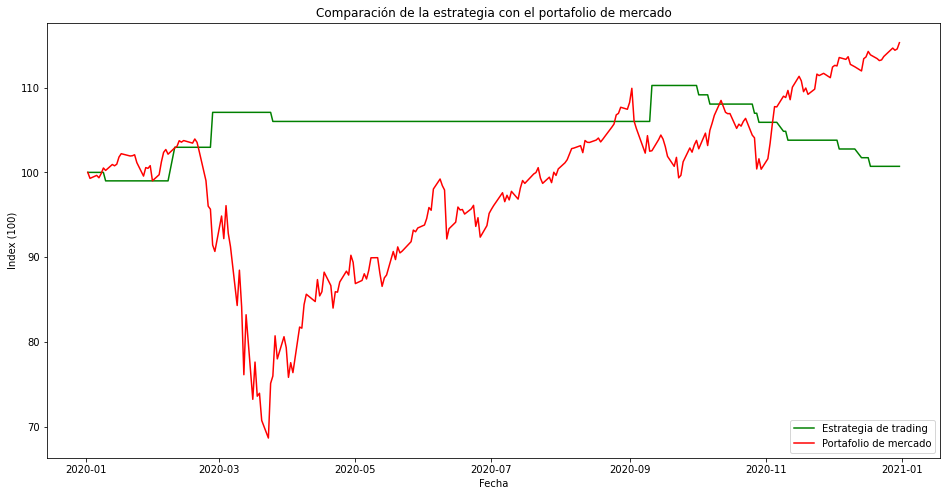

In [ ]:
# Comparación de la estrategia con el portafolio de mercado
plt.figure(figsize=(16,8))
plt.plot(df['Equity'], color = 'green', label = 'Estrategia de trading')
plt.plot(mkt['Close_100'], color = 'red', label = 'Portafolio de mercado')

plt.title('Comparación de la estrategia con el portafolio de mercado')
plt.xlabel('Fecha')
plt.ylabel('Index (100)')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Desempeño de la estrategia planteada
df['Log Returns'] = np.log(df['Equity']).diff()

ret = 252*df['Log Returns'].mean()
print('Retorno esperado anulizado: {:.4f}'.format(ret))

vol = np.sqrt(252)*df['Log Returns'].std()
print('Volatilidad anulizada: {:.4f}'.format(vol))

sharpe_ratio = (ret - 0.01)/vol
print('Sharpe Ratio: {:.4f}'.format(sharpe_ratio))

Retorno esperado anulizado: 0.0071
Volatilidad anulizada: 0.0758
Sharpe Ratio: -0.0381


In [ ]:
# Desempeño del portafolio de mercado
mkt['Log Returns'] = np.log(mkt['Close']).diff()

ret = 252*mkt['Log Returns'].mean()
print('Retorno esperado anulizado: {:.4f}'.format(ret))

vol = np.sqrt(252)*mkt['Log Returns'].std()
print('Volatilidad anulizada: {:.4f}'.format(vol))

sharpe_ratio = (ret - 0.01)/vol
print('Sharpe Ratio: {:.4f}'.format(sharpe_ratio))

Retorno esperado anulizado: 0.1423
Volatilidad anulizada: 0.3475
Sharpe Ratio: 0.3808
